In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

X = data.data
y = data.target

In [2]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=1,
                  train_size=0.8,
                  test_size=0.2,
                  random_state=0)

train_index,test_index = next(ss.split(X,y))

X_train,X_test = X[train_index],X[test_index]
y_train,y_test = y[train_index],y[test_index]

In [3]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [4]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 #カイ二乗基準

skb = SelectKBest(chi2,k=20)

In [5]:
skb.fit(X_train,y_train)

SelectKBest(k=20, score_func=<function chi2 at 0x1389e4040>)

In [6]:
X_train_new = skb.transform(X_train)

In [7]:
X_train_new.shape

(455, 20)

In [8]:
skb.get_support()

array([ True,  True,  True,  True, False,  True,  True,  True, False,
       False,  True, False,  True,  True, False,  True,  True, False,
       False, False,  True,  True,  True,  True, False,  True,  True,
        True,  True, False])

In [9]:
data.feature_names[skb.get_support()]

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean compactness', 'mean concavity', 'mean concave points',
       'radius error', 'perimeter error', 'area error',
       'compactness error', 'concavity error', 'worst radius',
       'worst texture', 'worst perimeter', 'worst area',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry'], dtype='<U23')

In [10]:
data.feature_names[~skb.get_support()]

array(['mean smoothness', 'mean symmetry', 'mean fractal dimension',
       'texture error', 'smoothness error', 'concave points error',
       'symmetry error', 'fractal dimension error', 'worst smoothness',
       'worst fractal dimension'], dtype='<U23')

In [11]:
from sklearn import linear_model
clf = linear_model.LogisticRegression(solver='liblinear')

from sklearn.model_selection import StratifiedKFold
k_range = np.arange(1,31)
scores = []
std = []

for k in k_range:
    ss = StratifiedKFold(n_splits=10,
                         shuffle=True,
                         random_state=2)
    score = []
    for train_index,val_index in ss.split(X_train,
                                          y_train):
        X_train2,X_val = X[train_index],X[val_index]
        y_train2,y_val = y[train_index],y[val_index]
        
        skb = SelectKBest(chi2,k=k)
        skb.fit(X_train2,y_train2)
        
        X_new_train2 = skb.transform(X_train2)
        X_new_val = skb.transform(X_val)
        
        clf.fit(X_new_train2,y_train2)
        score.append(clf.score(X_new_val,y_val))
        
    scores.append(np.array(score).mean())
    std.append(np.array(score).std())
    
scores = np.array(scores)
std = np.array(std)
        

In [12]:
scores

array([0.90753623, 0.93173913, 0.92299517, 0.92289855, 0.93628019,
       0.94057971, 0.94719807, 0.94942029, 0.94724638, 0.95816425,
       0.95821256, 0.95821256, 0.9626087 , 0.9626087 , 0.9626087 ,
       0.9626087 , 0.9626087 , 0.9626087 , 0.96483092, 0.9626087 ,
       0.9626087 , 0.9626087 , 0.9626087 , 0.9626087 , 0.9626087 ,
       0.96483092, 0.96483092, 0.96483092, 0.96483092, 0.96483092])

Text(0, 0.5, 'accuracy')

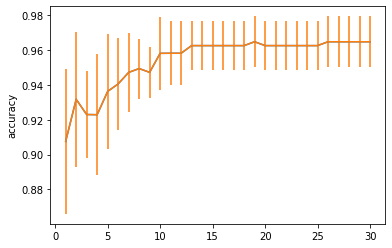

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(k_range,scores)
plt.errorbar(k_range,scores,yerr=std)
plt.ylabel("accuracy")

Text(0, 0.5, 'error rate')

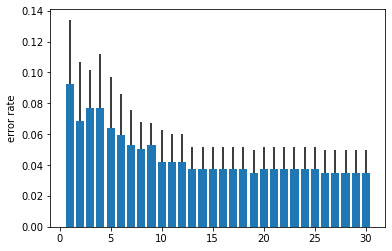

In [16]:
plt.bar(k_range, 1-scores,yerr = [np.zeros(std.shape),std])
plt.ylabel("error rate")

In [18]:
best_k = k_range[np.argmax(scores)]
best_k

19

In [19]:
skb = SelectKBest(chi2,k=best_k)
skb.fit(X_train,y_train)

SelectKBest(k=19, score_func=<function chi2 at 0x1389e4040>)

In [21]:
X_train_best = skb.transform(X_train)
X_test_best = skb.transform(X_test)

In [22]:
clf.fit(X_train_best,y_train)

LogisticRegression(solver='liblinear')

In [23]:
clf.score(X_test_best,y_test)

0.956140350877193